# Comparing Suburbs and Identifying Clusters

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

## Data Imports

In [3]:
# 2018-2019 data
df = pd.read_excel(open('data/ts19individual06taxablestatusstateterritorypostcode.xlsx', 'rb'),sheet_name='Table 6A', skiprows=1)

In [4]:
df = df.dropna()
df.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
0,Non Taxable,ACT,2600,1050,1006,12648452,259,610116,13,21049,...,59971,95,22502,742,468,430084,62,34128,53,25386
1,Non Taxable,ACT,2601,1173,1136,9900103,154,176445,3,6188,...,36461,44,8931,377,127,77225,30,10380,7,2297
2,Non Taxable,ACT,2602,4194,4054,52275968,1182,1362902,19,11577,...,265181,404,99011,2175,1294,884597,172,60678,123,42080
3,Non Taxable,ACT,2603,1060,1003,12662531,302,485408,8,9183,...,68818,114,27038,682,418,346810,46,20473,55,26914
4,Non Taxable,ACT,2604,1224,1176,15351889,353,503655,20,16766,...,77744,116,31954,685,448,332876,65,29331,65,18541


## NSW Dataframe

In [5]:
df_nsw = df[df['State/ Territory1'] == 'NSW']
df_nsw

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
29,Non Taxable,NSW,1225,10,10,-429822,1,993,0,0,...,0,0,0,5,4,2184,1,610,0,0
30,Non Taxable,NSW,1230,20,19,64076,7,5519,0,0,...,1343,1,255,12,12,12211,1,26,0,0
31,Non Taxable,NSW,1235,22,19,-60906,4,3375,0,0,...,735,1,207,10,9,9295,1,89,0,0
32,Non Taxable,NSW,1240,21,18,41732,4,1584,0,0,...,1116,2,468,6,6,3081,0,0,1,481
33,Non Taxable,NSW,1335,14,13,38233,2,1583,0,0,...,0,0,0,10,9,7699,1,6,2,619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,Taxable,NSW,2879,174,174,12867368,174,2944698,166,238438,...,28475,157,125730,87,70,39557,20,5261,22,9282
3348,Taxable,NSW,2880,6805,6805,485162220,6805,106089472,6418,9211250,...,1210064,6238,4662623,3989,3433,2219389,544,186337,899,326860
3349,Taxable,NSW,2898,249,249,19243790,249,4510219,242,372232,...,43626,221,168247,138,119,80073,11,5387,37,20797
3350,Taxable,NSW,2899,858,858,49192318,858,9132050,829,922955,...,207540,823,600466,384,348,229133,26,10597,52,18029


### Taxable Income or Loss

In [6]:
df_nsw_taxable_income = df_nsw[['Postcode', 'Taxable income or loss3\n$']].copy()
df_nsw_taxable_income = df_nsw_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_nsw_taxable_income = df_nsw_taxable_income[df_nsw_taxable_income['Postcode'] != 'NSW other']
df_nsw_taxable_income

,Postcode,Taxable income or loss
29,1225,-429822
30,1230,64076
31,1235,-60906
32,1240,41732
33,1335,38233
...,...,...
3346,2878,7564444
3347,2879,12867368
3348,2880,485162220
3349,2898,19243790


In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


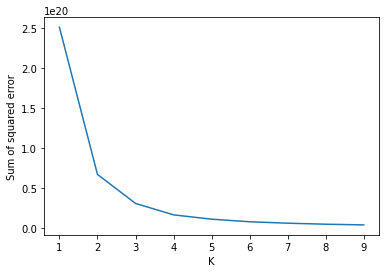

In [8]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [9]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_taxable_income)

df_nsw_taxable_income['cluster'] = yp

df1 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==0]
df2 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==1]
df3 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==2]
df4 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==3]

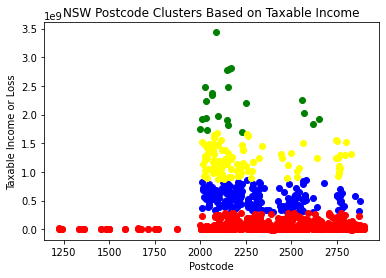

In [10]:
plt.title("NSW Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

### Salary/Wages

In [11]:
df_nsw_salary_wages = df_nsw[['Postcode', 'Salary or wages\n$']].copy()
df_nsw_salary_wages = df_nsw_salary_wages.rename(columns={'Salary or wages\n$': 'Salary/Wages'})
df_nsw_salary_wages = df_nsw_salary_wages[df_nsw_salary_wages['Postcode'] != 'NSW other']
df_nsw_salary_wages

,Postcode,Salary/Wages
29,1225,332606
30,1230,53802
31,1235,397048
32,1240,106406
33,1335,19427
...,...,...
3346,2878,4407678
3347,2879,9517111
3348,2880,428141886
3349,2898,12343083


In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


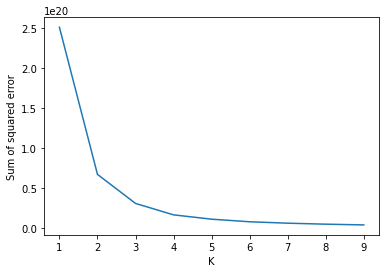

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_salary_wages)

df_nsw_salary_wages['cluster'] = yp

df1 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==0]
df2 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==1]
df3 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==2]
df4 = df_nsw_salary_wages[df_nsw_salary_wages.cluster==3]

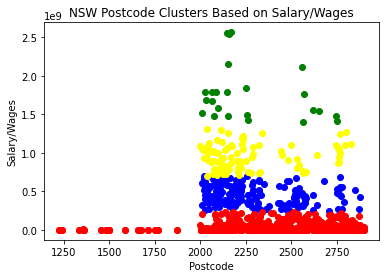

In [15]:
plt.title("NSW Postcode Clusters Based on Salary/Wages")
plt.xlabel("Postcode")
plt.ylabel("Salary/Wages")

plt.scatter(df1['Postcode'],df1['Salary/Wages'],color='blue')
plt.scatter(df2['Postcode'],df2['Salary/Wages'],color='green')
plt.scatter(df3['Postcode'],df3['Salary/Wages'],color='yellow')
plt.scatter(df4['Postcode'],df4['Salary/Wages'],color='red')

## Victoria Dataframe

In [16]:
df_vic = df[df['State/ Territory1'] == 'VIC']
df_vic

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
1605,Non Taxable,VIC,3000,8564,8020,80423510,1749,1291913,23,32704,...,521647,679,102719,1590,879,531109,281,75488,45,12490
1606,Non Taxable,VIC,3001,492,491,1142734,9,10081,0,0,...,1308,2,876,12,9,8006,0,0,0,0
1607,Non Taxable,VIC,3002,632,595,7633881,166,347141,3,9109,...,36607,50,10556,380,285,253309,52,24803,20,10025
1608,Non Taxable,VIC,3003,1230,1161,12594637,274,213688,1,1802,...,71977,96,14646,320,189,134110,44,10651,18,6843
1609,Non Taxable,VIC,3004,1900,1766,19178469,461,583456,15,16452,...,118371,174,31171,906,679,593366,131,40348,41,22525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,Taxable,VIC,3992,369,369,22292399,369,4369302,342,415326,...,81431,359,257267,118,107,57339,11,4200,21,7182
4980,Taxable,VIC,3995,3799,3799,226145040,3799,44019784,3493,4167384,...,885790,3592,2587001,1229,1102,682226,122,33829,265,108293
4981,Taxable,VIC,3996,2288,2288,163433473,2288,36221598,2131,3083833,...,441932,2042,1486464,1266,1163,804091,76,25450,341,161286
4982,Taxable,VIC,8007,34,34,4121930,34,1233033,28,79352,...,2617,14,8207,26,22,13368,2,886,16,5607


### Taxable Income or Loss

In [17]:
df_vic_taxable_income = df_vic[['Postcode', 'Taxable income or loss3\n$']].copy()
df_vic_taxable_income = df_vic_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 'VIC other']
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 8007]
df_vic_taxable_income

,Postcode,Taxable income or loss
1605,3000,80423510
1606,3001,1142734
1607,3002,7633881
1608,3003,12594637
1609,3004,19178469
...,...,...
4977,3990,4397267
4978,3991,9608992
4979,3992,22292399
4980,3995,226145040


In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


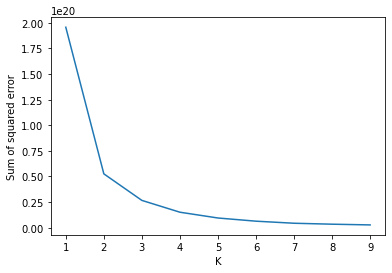

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_taxable_income)

df_vic_taxable_income['cluster'] = yp

df1 = df_vic_taxable_income[df_vic_taxable_income.cluster==0]
df2 = df_vic_taxable_income[df_vic_taxable_income.cluster==1]
df3 = df_vic_taxable_income[df_vic_taxable_income.cluster==2]
df4 = df_vic_taxable_income[df_vic_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
4282,3002,508189253,0
4283,3003,301559603,0
4284,3004,698850590,0
4286,3008,710242196,0
4289,3013,760650035,0


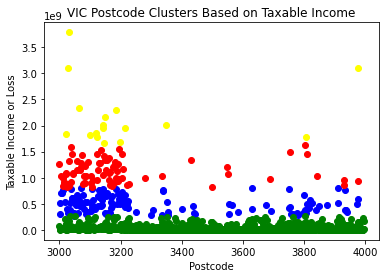

In [21]:
plt.title("VIC Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

## Victoria Postcode Clusters Based On Income
Based on the Scatterplot above, the following observation is evident that
1. Cluster 1(green) contains the most numbers in the plot, aswell as having the least taxable income compared to the other clusters. the postcodes affiliated with this cluster all share this property has the entire bottom part of the plot is covered in green dots
2. Cluster 0(blue) the cluster with the 2nd most taxable income in the cluster, most of this contained within postcodes numbered 3000-3200, with a smaller percentage around postcodes around 3800
3. Cluster 3(red) is similar to Cluster 0 as most of this cluster is within postcodes 3000-3200, with postcodes outside this range are found sparsely in the plot
4. Cluster 2(yellow) has the least numbers in the plot but has the highest taxable income by postcode


### Salary/Wages

In [22]:
df_vic_salary_wages = df_vic[['Postcode', 'Salary or wages\n$']].copy()
df_vic_salary_wages = df_vic_salary_wages.rename(columns={'Salary or wages\n$': 'Salary/Wages'})
df_vic_salary_wages = df_vic_salary_wages[df_vic_salary_wages['Postcode'] != 'VIC other']
df_vic_salary_wages = df_vic_salary_wages[df_vic_salary_wages['Postcode'] != 8007]
df_vic_salary_wages

,Postcode,Salary/Wages
1605,3000,66285786
1606,3001,102990
1607,3002,2974100
1608,3003,9137633
1609,3004,10707638
...,...,...
4977,3990,3430331
4978,3991,7938153
4979,3992,18422267
4980,3995,175585481


In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


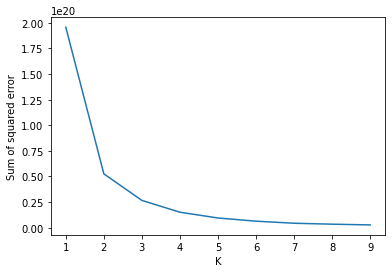

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [25]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_salary_wages)

df_vic_salary_wages['cluster'] = yp

df0 = df_vic_salary_wages[df_vic_salary_wages.cluster==0]
df1 = df_vic_salary_wages[df_vic_salary_wages.cluster==1]
df2 = df_vic_salary_wages[df_vic_salary_wages.cluster==2]
df3 = df_vic_salary_wages[df_vic_salary_wages.cluster==3]

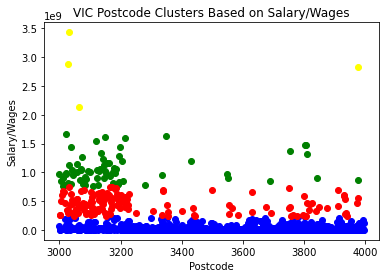

In [26]:
plt.title("VIC Postcode Clusters Based on Salary/Wages")
plt.xlabel("Postcode")
plt.ylabel("Salary/Wages")

plt.scatter(df0['Postcode'],df0['Salary/Wages'],color='blue')
plt.scatter(df1['Postcode'],df1['Salary/Wages'],color='green')
plt.scatter(df2['Postcode'],df2['Salary/Wages'],color='yellow')
plt.scatter(df3['Postcode'],df3['Salary/Wages'],color='red')

## Victoria Postcode Clusters Based On Salary/Wages
Based on the Scatterplot above, the following observation is evident that
1. Cluster 0(blue) contains the most numbers in the plot, aswell as the postcode with the least amount of salary. similar to Cluster 1 in the previous plot this cluster covers the bottom portion of this scatterplot
2. Cluster 3(red) the cluster with the 2nd most taxable income in the cluster
3. Cluster 1(green) is mostly contained 
Cluster 3 and 1 are both mostly contained within the postcodes within 3000-3200
4. Cluster 2(yellow) has the least numbers in the plot, with a total of 4 postcodes within the cluster


Range of income for all the clustered dataframes

In [27]:
df1.head()

,Postcode,Salary/Wages,cluster
4280,3000,979120543,1
4285,3006,847722961,1
4287,3011,766666902,1
4288,3012,895032618,1
4290,3015,775106018,1


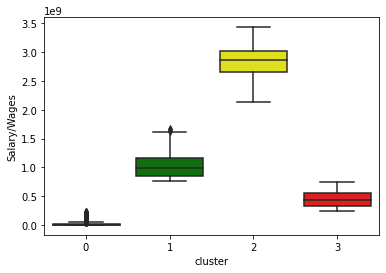

In [28]:
palette = ['blue', 'green','yellow','red']
ax = sns.boxplot(x="cluster", y="Salary/Wages", data=df_vic_salary_wages, palette=palette)

From the boxplot we determine that cluster 0 (blue) has the lowest range of income. 
The yellow cluster comes second, followed by green 
Red cluster accounts for people who earn the most. 

This boxplot data matches with the Scatterplot data based on salary wages in victoria

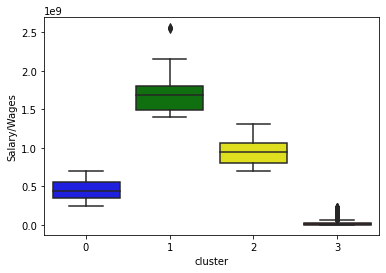

In [34]:
palette = ['blue', 'green','yellow','red']
ax = sns.boxplot(x="cluster", y="Salary/Wages", data=df_nsw_salary_wages, palette=palette)

This Boxplot data is based on the scatterplot of NSW salary wages, with the data being matched with each other